In [42]:
import numpy as np
from numpy import genfromtxt
import pylab as pl
from matplotlib import collections  as mc
import matplotlib.pyplot as plt
import matplotlib.colors as mco
from plotter import Plotter
%matplotlib inline

## Line Figure
### 1.
### `Y vs X`: Accuracy *vs* Epoch, Loss *vs* Epoch
### `Legend`: traning accuracy, testing accurcy, training loss, testing loss

**Data Source**

Set the directory of the records and the save path of the plot. For example, if one want to plot the result of BIBD model and BIBD&GC model, one needs to modify the codes of the $\#\#$ blocks.

`records = 20
epoches = 75
path = './figures/ResNet_BIBD_BIBD&GC.png'
models = ['BIBD', "BIBD_GC"]
`

The names in the `models` should be consistent with the result folder name.

In [96]:
############################################################################
## set the number of records
records = 10

## set the number of epoches in each records
epoches = 75
                                                                   
## set the save path of the figures                         
path = './figures/Accuracy_Loss_ResNet18_ResNet34_GC.png'                                   
## set the dir name of the records                                           
# models = ['EE','EE_BIBD', 'GC_EE', 'BIBD_EE_GC']                                      
# labels = ['EE_3', 'EE_1', 'EE_2', 'EE_BIBD_3', 'EE_BIBD_2', 'EE_BIBD_3', 
#          'EE_GC_3', 'EE_GC_1', 'EE_GC_2', 'EE_BIBD_GC_3', 'EE_BIBD_GC_1', 'EE_BIBD_GC_2'] 

models = 'BIBD BIBD_GC_2 BIBD_GC_4 BIBD_GC_8 BIBD_GC_16 BIBD_34 ResNet34_BIBD_GC_2 ResNet34_BIBD_GC_4 ResNet34_BIBD_GC_8 ResNet34_BIBD_GC_16'.split(' ')
labels = 'BResNet-18 BResNet-18_2 BIBD_GC_4 BIBD_GC_8 BIBD_GC_16 BIBD_34 ResNet34_BIBD_GC_2 ResNet34_BIBD_GC_4 ResNet34_BIBD_GC_8 ResNet34_BIBD_GC_16'.split(' ')
                                                                       
############################################################################

train_acc_files = ['./results/'+name+'/train_acc_' for name in models]
train_loss_files = ['./results/'+name+'/train_loss_' for name in models]
test_acc_files = ['./results/'+name+'/test_acc_' for name in models]
test_loss_files = ['./results/'+name+'/test_loss_' for name in models]
labels = np.array(labels)

train_acc = None
train_loss = None
test_acc = None
test_loss = None

for n in range(len(models)):
    train_acc_temp = 0
    train_loss_temp = 0
    test_acc_temp = 0
    test_loss_temp = 0
    for i in range(records): # accumulate models[n]'s 20 results
        train_acc_temp += genfromtxt(train_acc_files[n] + str(i + 1) + '.csv', delimiter = ',').reshape(epoches,-1)
        train_loss_temp += genfromtxt(train_loss_files[n] + str(i + 1) + '.csv', delimiter = ',').reshape(epoches,-1)
        test_acc_temp += genfromtxt(test_acc_files[n] + str(i + 1) + '.csv', delimiter = ',').reshape(epoches,-1)
        test_loss_temp += genfromtxt(test_loss_files[n] + str(i + 1) + '.csv', delimiter = ',').reshape(epoches,-1)
    # taking average
    if type(train_acc) != type(train_acc_temp):
        train_acc = train_acc_temp / records
        train_loss = train_loss_temp / records
        test_acc = test_acc_temp / records
        test_loss = test_loss_temp / records
    else:
        train_acc = np.append(train_acc, (train_acc_temp / records).reshape(epoches,-1), 1)
        train_loss = np.append(train_loss, (train_loss_temp / records).reshape(epoches,-1), 1)
        test_acc = np.append(test_acc, (test_acc_temp / records).reshape(epoches,-1), 1)
        test_loss = np.append(test_loss, (test_loss_temp / records).reshape(epoches,-1), 1)

**Final Accuracy/Loss vs Group Number**

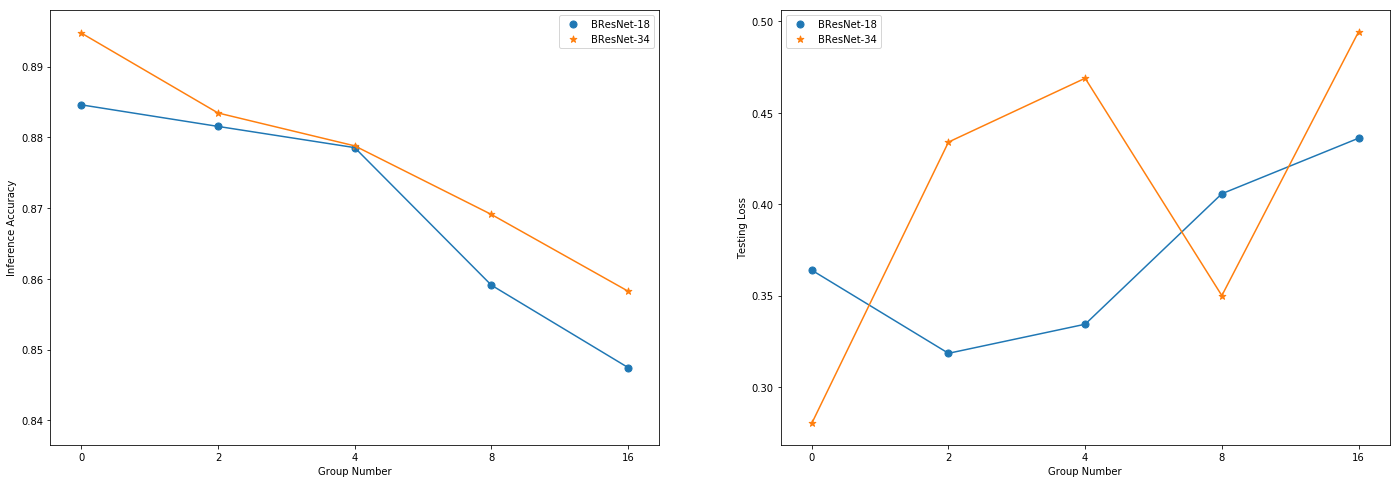

In [97]:
x_axis = np.array(['0', '2', '4', '8', '16'])
y_18_ac = test_acc[-1][0:5]
y_34_ac = test_acc[-1][5:]
y_18_lo = test_loss[-1][0:5]
y_34_lo = test_loss[-1][5:]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(24, 8))
ax1.scatter(x_axis, y_18_ac, s = 50, label = 'BResNet-18')
ax1.scatter(x_axis, y_34_ac, s = 50, marker = '*', label = 'BResNet-34')
ax1.plot(x_axis, y_18_ac)
ax1.plot(x_axis, y_34_ac)
ax1.legend()
ax1.set_ylabel('Inference Accuracy')
ax1.set_xlabel('Group Number')

ax2.scatter(x_axis, y_18_lo, s = 50, label = 'BResNet-18')
ax2.scatter(x_axis, y_34_lo, s = 50, marker = '*', label = 'BResNet-34')
ax2.plot(x_axis, y_18_lo)
ax2.plot(x_axis, y_34_lo)
ax2.legend()
ax2.set_ylabel('Testing Loss')
ax2.set_xlabel('Group Number')
plt.savefig('./figures/Final_Accuracy_Loss_ResNet18_ResNet34_GC.png')

**Final Accuracy/Loss vs Epoch**

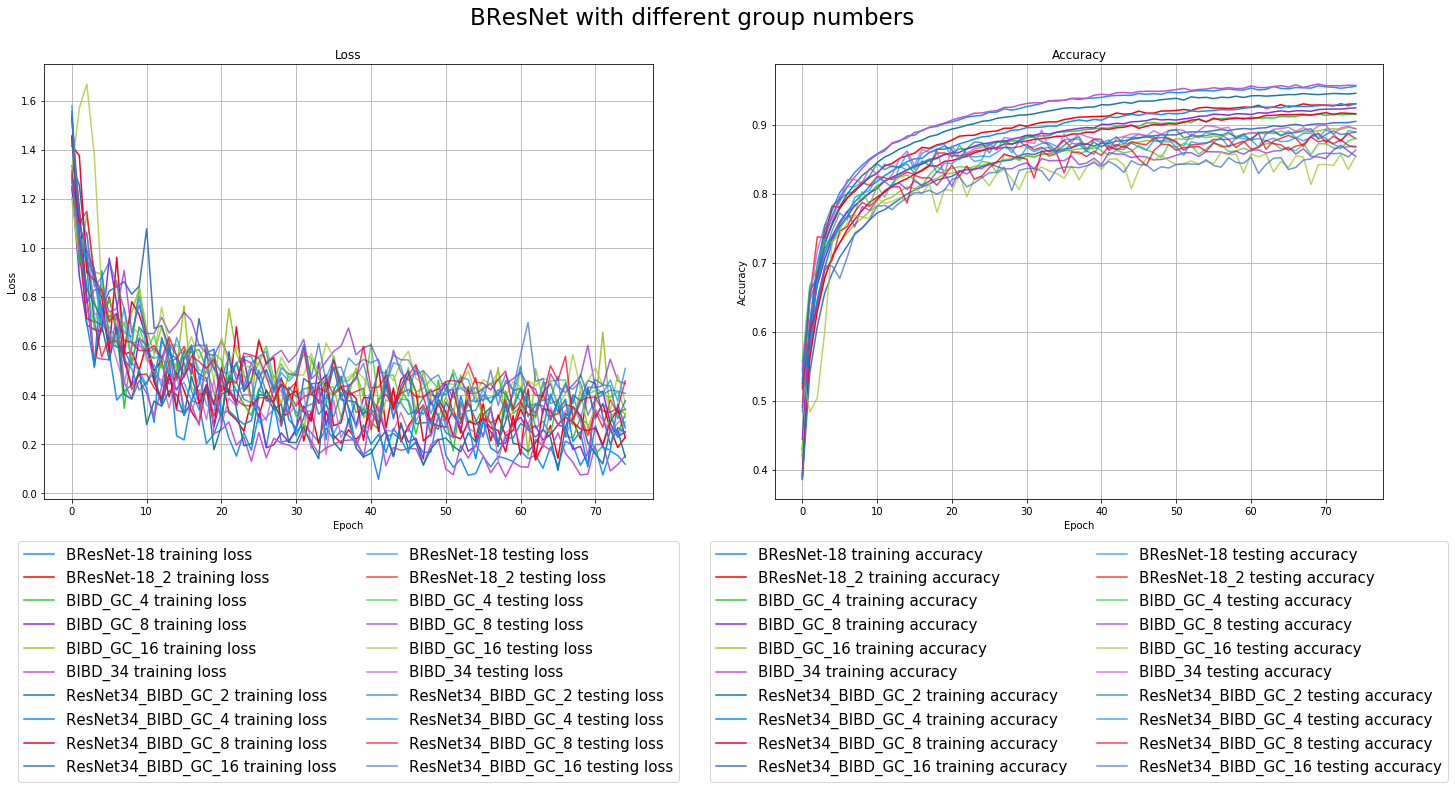

In [74]:
############################################################################
'''
plotter = Plotter(title="BResNet with different group numbers",
                         save_to_filepath=path)                           
plotter.plot_values(np.take(labels,[0,3,6,9]), train_loss[:,[0,3,6,9]], test_loss[:,[0,3,6,9]], 
                    train_acc[:,[0,3,6,9]], test_acc[:,[0,3,6,9]])  
'''
plotter = Plotter(title="BResNet with different group numbers",
                         save_to_filepath=path)                           
plotter.plot_values(labels, train_loss, test_loss, 
                    train_acc, test_acc)  
############################################################################

In [61]:
############################################################################
## For additional exits.

plotter = Plotter(title="BResNet with different group numbers",
                         save_to_filepath='./figures/EE_models_1.png')                           
plotter.plot_values(np.take(labels,[1,4,7,10]), train_loss[:,[1,4,7,10]], test_loss[:,[1,4,7,10]], 
                    train_acc[:,[1,4,7,10]], test_acc[:,[1,4,7,10]])  

############################################################################

IndexError: index 10 is out of bounds for axis 0 with size 10

In [62]:
############################################################################
## For additional exits.

plotter = Plotter(title="exit 2 of EE models result",
                         save_to_filepath='./figures/EE_models_2.png')                           
plotter.plot_values(np.take(labels,[2,5,8,11]), train_loss[:,[2,5,8,11]], test_loss[:,[2,5,8,11]], 
                    train_acc[:,[2,5,8,11]], test_acc[:,[2,5,8,11]])  

############################################################################

IndexError: index 11 is out of bounds for axis 0 with size 10

In [15]:
print (train_loss[74,:])

[0.0642395 0.398345  0.0984695 0.16138   0.473635  0.253759  0.090415
 0.426025  0.181835  0.20511   0.48211   0.32684  ]


In [7]:
print (train_acc[74,:])

[0.981445 0.86769  0.968205 0.95576  0.83992  0.917635 0.97254  0.852365
 0.93826  0.929065 0.829585 0.88686 ]


In [8]:
print (test_loss[74,:])

[0.317185 0.39717  0.31629  0.35126  0.47866  0.370545 0.335835 0.459415
 0.37458  0.40131  0.533285 0.45829 ]


In [9]:
print (test_acc[74,:])

[0.911305 0.852535 0.90189  0.886145 0.82873  0.86923  0.89679  0.840095
 0.88271  0.869705 0.818455 0.853225]


### 2.
### `Y vs X`: Inference Time *vs* Early Exit Point
### `Legend`: BResNet-18

In [30]:
############################################################################
## set the number of records
records = 10

## set the number of epoches in each records
epoches = 61
                                                                   
## set the save path of the figures                         
path = './figures/InferenceTime_vs_EarlyExit.png'                                   
## set the dir name of the records                                           
models = 'BIBD_GC_EE ResNet34_BIBD_GC_EE'.split(' ')
                                                                       
############################################################################

inference_time_files = ['./results/'+name+'/test_time_' for name in models]
# labels = np.array(labels)

inference_time = None

for n in range(len(models)):
    inference_time_temp = 0
    for i in range(records): # accumulate models[n]'s 10 results
        inference_time_temp += genfromtxt(inference_time_files[n] + str(i + 1) + '.csv', delimiter = ',')[0:61].reshape(epoches,-1)
    # taking average
    if type(inference_time) != type(inference_time_temp):    # the first element
        inference_time = inference_time_temp / records
    else:
        inference_time = np.append(inference_time, (inference_time_temp / records).reshape(epoches,-1), 1)

In [33]:
inference_time = inference_time[60]    # 60 epochs
inference_time /=  10    # in the inference part, we have 10000 samples to inference. The unit is microseconds

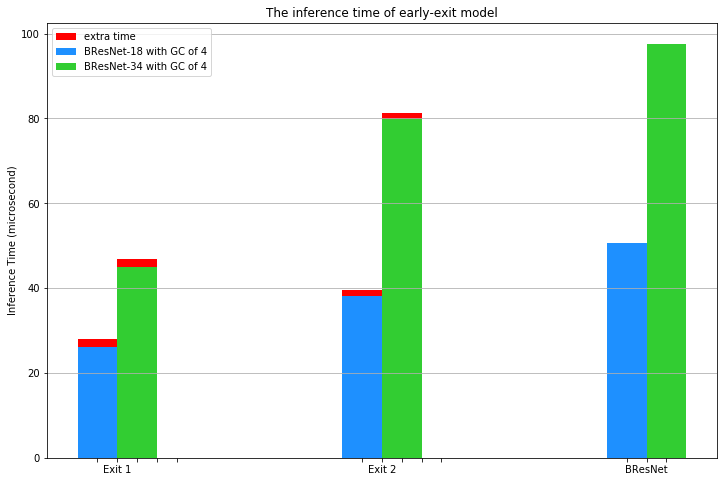

In [108]:
plt.figure(figsize=(12,8))

x = np.array([0, 0.15, 0.3,
              2, 2.15, 2.3,
              4, 4.15, 4.3])
br18 = [0, 5, 10]
br34 = [2, 7, 12]
br_extra = [0, 5, 2, 7]
inf_18 = [inference_time[0], inference_time[1], inference_time[2]]
inf_34 = [inference_time[6], inference_time[7], inference_time[8]]
extra = [inference_time[0] + inference_time[3], 
         inference_time[1] + inference_time[4], 
         inference_time[6] + inference_time[9],
         inference_time[7] + inference_time[10]]

plt.bar(x[br_extra], extra, color = 'r', width = 0.3, label = 'extra time')
plt.bar(x[br18], inf_18, color = [0.11764705882352941, 0.5647058823529412, 1.0], width = 0.3, label='BResNet-18 with GC of 4')
plt.bar(x[br34], inf_34, color = [0.19607843137254902, 0.803921568627451, 0.19607843137254902], width = 0.3, label='BResNet-34 with GC of 4')

xks = ['', 'Exit 1', '', '','',  
       '', 'Exit 2', '', '', '',
       '', 'BResNet', '']
plt.xticks(x, xks)
plt.title('The inference time of early-exit model')
plt.legend()
plt.ylabel('Inference Time (microsecond)')
plt.grid(axis='y')
plt.savefig(path)

### 3.
### `Y vs X`: Accuracy *vs* Early Exit Point
### `Legend`: BResNet-18

In [24]:
############################################################################
## set the number of records
records = 10

## set the number of epoches in each records
epoches = 61
                                                                   
## set the save path of the figures                         
path = './figures/Accuracy_vs_EarlyExit_18.png'                                   
## set the dir name of the records                                           
# models = ['EE','EE_BIBD', 'GC_EE', 'BIBD_EE_GC']                                      
# labels = ['EE_3', 'EE_1', 'EE_2', 'EE_BIBD_3', 'EE_BIBD_2', 'EE_BIBD_3', 
#          'EE_GC_3', 'EE_GC_1', 'EE_GC_2', 'EE_BIBD_GC_3', 'EE_BIBD_GC_1', 'EE_BIBD_GC_2'] 

models = 'BIBD_GC_EE'.split(' ')
labels = 'Exit 1@Exit 2@BResNet-18'.split('@')
                                                                       
############################################################################

train_acc_files = ['./results/'+name+'/train_acc_' for name in models]
train_loss_files = ['./results/'+name+'/train_loss_' for name in models]
test_acc_files = ['./results/'+name+'/test_acc_' for name in models]
test_loss_files = ['./results/'+name+'/test_loss_' for name in models]
labels = np.array(labels)

train_acc = None
train_loss = None
test_acc = None
test_loss = None

for n in range(len(models)):
    train_acc_temp = 0
    train_loss_temp = 0
    test_acc_temp = 0
    test_loss_temp = 0
    for i in range(records): # accumulate models[n]'s 20 results
        train_acc_temp += genfromtxt(train_acc_files[n] + str(i + 1) + '.csv', delimiter = ',')[0:61].reshape(epoches,-1)
        train_loss_temp += genfromtxt(train_loss_files[n] + str(i + 1) + '.csv', delimiter = ',')[0:61].reshape(epoches,-1)
        test_acc_temp += genfromtxt(test_acc_files[n] + str(i + 1) + '.csv', delimiter = ',')[0:61].reshape(epoches,-1)
        test_loss_temp += genfromtxt(test_loss_files[n] + str(i + 1) + '.csv', delimiter = ',')[0:61].reshape(epoches,-1)
    # taking average
    if type(train_acc) != type(train_acc_temp):
        train_acc = train_acc_temp / records
        train_loss = train_loss_temp / records
        test_acc = test_acc_temp / records
        test_loss = test_loss_temp / records
    else:
        train_acc = np.append(train_acc, (train_acc_temp / records).reshape(epoches,-1), 1)
        train_loss = np.append(train_loss, (train_loss_temp / records).reshape(epoches,-1), 1)
        test_acc = np.append(test_acc, (test_acc_temp / records).reshape(epoches,-1), 1)
        test_loss = np.append(test_loss, (test_loss_temp / records).reshape(epoches,-1), 1)
    
train_acc = train_acc[0:61, [1, 2, 0]]
train_loss = train_loss[0:61, [1, 2, 0]]
test_acc = test_acc[0:61, [1, 2, 0]]
test_loss = test_loss[0:61, [1, 2, 0]]

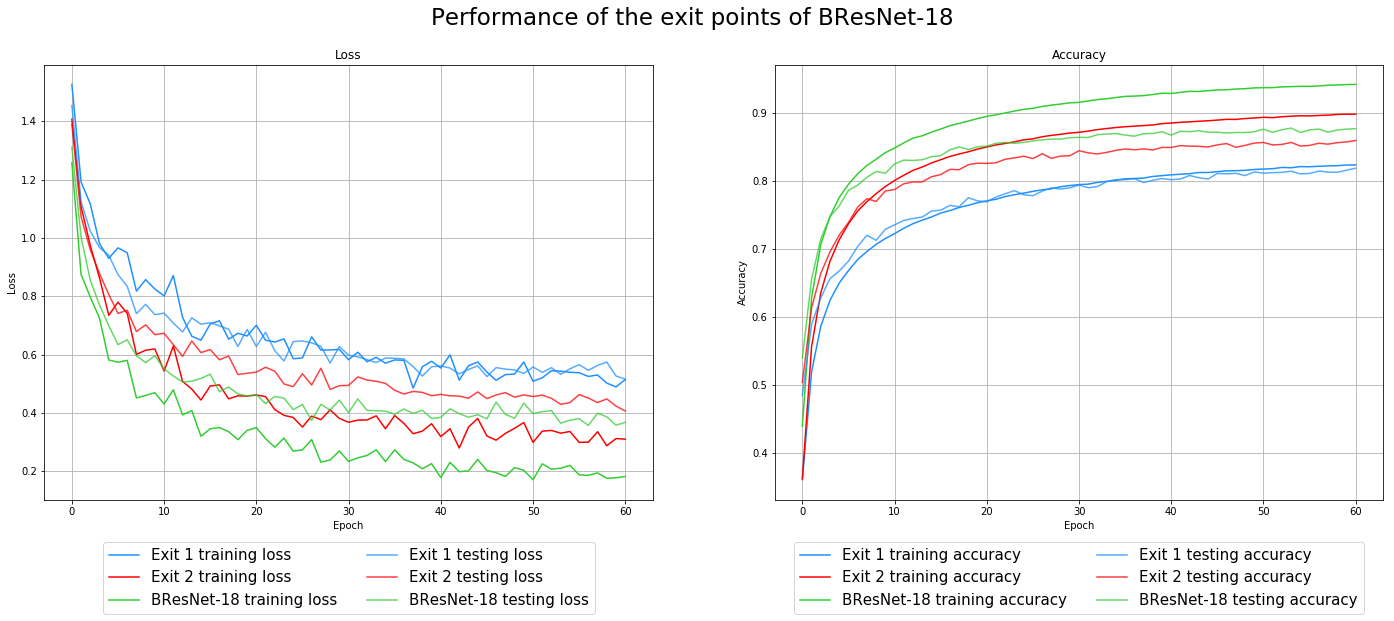

In [25]:
############################################################################
'''
plotter = Plotter(title="BResNet with different group numbers",
                         save_to_filepath=path)                           
plotter.plot_values(np.take(labels,[0,3,6,9]), train_loss[:,[0,3,6,9]], test_loss[:,[0,3,6,9]], 
                    train_acc[:,[0,3,6,9]], test_acc[:,[0,3,6,9]])  
'''
plotter = Plotter(title="Performance of the exit points of BResNet-18",
                         save_to_filepath=path)                           
plotter.plot_values(labels, train_loss, test_loss, 
                    train_acc, test_acc)   
############################################################################

## Table Figure

In [19]:
path = './results/BIBD_GC/'
train_time = 0
test_time = 0
for i in range(1,21):
    train_time += genfromtxt(path + 'train_time_' + str(i) + '.csv', delimiter = ',')
    test_time += genfromtxt(path + 'test_time_' + str(i) + '.csv', delimiter = ',')
train_time = train_time / 20
test_time = test_time / 20
print (train_time[-1])
print (test_time[-1])

23497.5
1757.6


|Model|Training Time(ms)|Inference Time(ms)|
|:---:|:---:|:---:|
|Resnet|28641.0|2071.72|
|BIBD|28843.5|2116.1|
|GC|21508.0|1499.85|
|BIBD & GC|23497.5|1757.6|

|Model|Exit 1 Inference Time(ms)| Exit 2 Inference Time(ms)|
|:---:|:---:|:---:|
|EE|706.75|707.37|
|EE_BIBD|744.515|745.535|
|GC_EE|904.4$^\ast$|905.3$^\ast$|
|BIBD_GC_EE|1266$^\ast$|1267$^\ast$|

*Note:* $\ast$ means the experiment still running, so it is not the final version.

## Scatter Figure
### 1.
### `Y vs X`: Inference Time *vs* Group Number
### `Legend`: ResNet-18, ResNet-34

In [3]:
############################################################################
## set the number of records
records = 10

## set the number of epoches in each records
epoches = 61
                                                                   
## set the save path of the figures                         
path = './figures/InferenceTime_vs_GroupNumber.png'                                   
## set the dir name of the records                                           
models = 'BIBD_GC_2 BIBD_GC_4 BIBD_GC_8 BIBD_GC_16 ResNet34_BIBD_GC_2 ResNet34_BIBD_GC_4 ResNet34_BIBD_GC_8 ResNet34_BIBD_GC_16'.split(' ')
# models = 'BIBD BIBD_GC_2 BIBD_GC_4 BIBD_GC_8 BIBD_GC_16 BIBD_34 ResNet34_BIBD_GC_2 ResNet34_BIBD_GC_4 ResNet34_BIBD_GC_16'.split(' ')
                                                                       
############################################################################

inference_time_files = ['./results/'+name+'/test_time_' for name in models]
# labels = np.array(labels)

inference_time = None

for n in range(len(models)):
    inference_time_temp = 0
    for i in range(records): # accumulate models[n]'s 10 results
        inference_time_temp += genfromtxt(inference_time_files[n] + str(i + 1) + '.csv', delimiter = ',').reshape(epoches,-1)
    # taking average
    if type(inference_time) != type(inference_time_temp):    # the first element
        inference_time = inference_time_temp / records
    else:
        inference_time = np.append(inference_time, (inference_time_temp / records).reshape(epoches,-1), 1)

In [4]:
inference_time = inference_time[-1]
inference_time /=  10000    # in the inference part, we have 10000 samples to inference
x_axis = np.array(['2', '4', '8', '16'])
y_18 = inference_time[0:4]
y_34 = inference_time[4:]

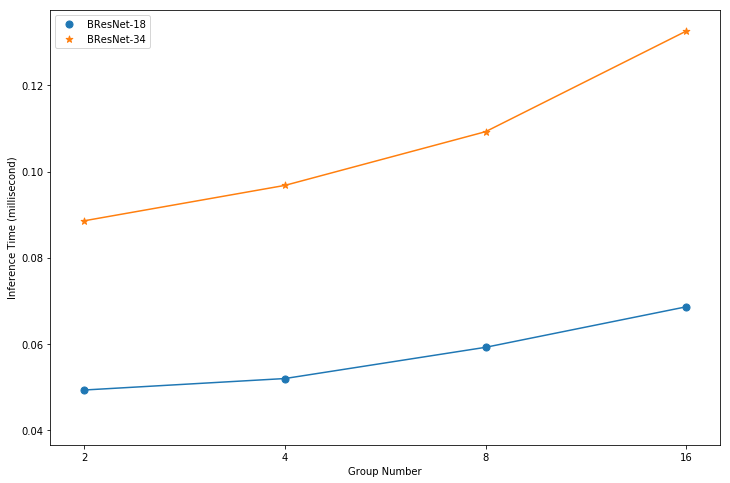

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(x_axis, y_18, s = 50, label = 'BResNet-18')
plt.scatter(x_axis, y_34, s = 50, marker = '*', label = 'BResNet-34')
plt.plot(x_axis, y_18)
plt.plot(x_axis, y_34)
plt.legend()
plt.ylabel('Inference Time (millisecond)')
plt.xlabel('Group Number')
plt.savefig(path)

**Comment**

The results show that in general the increasing of the group number may entail slightly more time to inference. It is somewhat surprising that the inference time of ResNet-34 at group number 0 is abnormally high. A further check (debug) is necessary.

In [31]:
inference_time.shape

(61, 12)

In [51]:
*BR_inf

SyntaxError: can't use starred expression here (<ipython-input-51-4f0b50f14729>, line 1)

In [31]:
inference_time[59]

array([ 280.59 ,  409.02 ,  538.07 ,   18.659,   14.521, 1647.3  ])

In [109]:
print(len(testset))

10000


In [13]:
inference_time

array([0.71218889, 0.64862222, 0.31024444, 0.28924444, 0.32856667,
       1.24524444, 0.86276667, 0.54615556, 0.56246667, 0.57453333])

In [118]:
inference_time = inference_time[-1] / 10000

In [120]:
inference_time / 10000

array([2.1240e-05, 6.5615e-05, 3.0210e-05, 3.5545e-05, 3.1705e-05,
       1.6875e-04, 9.7465e-05, 5.4315e-05, 5.4310e-05, 5.7140e-05])

In [22]:
# the inference time of group = 0,2,4,...
inference_time

array([0.71218889, 0.64862222, 0.31024444, 0.28924444, 0.32856667,
       1.24524444, 0.86276667, 0.54615556, 0.56246667, 0.57453333])

In [56]:
# the inference time of early exit
inference_time

array([ 28.059 ,  40.902 ,  53.807 ,   1.8659,   1.4521, 164.73  ])

In [29]:
inference_time

array([ 26.061 ,  38.188 ,  50.545 ,   1.9836,   1.4387, 266.97  ,
        45.078 ,  79.908 ,  97.636 ,   1.8197,   1.3988, 265.21  ])

([<matplotlib.axis.XTick at 0x7fe1c0b4f240>,
 <a list of 16 Text xticklabel objects>)

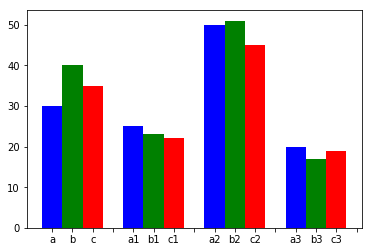

In [77]:
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.array([0.25 * i for i in range(16)])
x1 = [0, 4, 8, 12]
x2 = [1, 5, 9, 13]
x3 = [2, 6, 10, 14]
plt.bar(X[x1], data[0], color = 'b', width = 0.25)
plt.bar(X[x2], data[1], color = 'g', width = 0.25)
plt.bar(X[x3], data[2], color = 'r', width = 0.25)
xs = ['a', 'b', 'c', '', 'a1', 'b1', 'c1', '', 'a2', 'b2', 'c2', '', 'a3', 'b3', 'c3', '',]
plt.xticks(X,xs)

In [75]:
x = [1,2,3,4,5,6]
a=[1,2]
print(x[0,3])

TypeError: list indices must be integers or slices, not tuple

In [9]:
t

2